In [1]:
#Importing useful libraries
import tensorflow as tf
import keras
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [2]:
data = pd.read_csv("MNIST.csv") #Loading the dataset

In [3]:
Y = pd.get_dummies(data.iloc[:,0]).values #One-hot encoding for labels
print(Y)

[[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


In [4]:
X = data.iloc[:,1:]
X = X.values.reshape(42000,28,28,1)
print(X.shape)

(42000, 28, 28, 1)


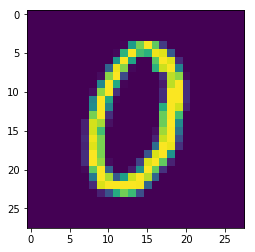

In [6]:
#visualizing an image from the dataset
import matplotlib.pyplot as plt
import cv2
plt.imshow(X[5,:,:,0])
plt.show()

In [7]:
#Splitting the dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state = 5)

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization, Dropout, Conv2D, MaxPooling2D

In [9]:
#Using ImageDataGenerator library for data augmentation
from keras_preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale = 1./255, zoom_range = 0.1, shear_range = 0.02, rotation_range = 10, width_shift_range=0.1, height_shift_range=0.1)
datagen.fit(X_train)
valgen = ImageDataGenerator(rescale = 1./255)
valgen.fit(X_test)

In [10]:
#Implementing LeNet-5 architecture
model = Sequential()

model.add(Conv2D(6,(5,5), padding = 'valid', activation = 'relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(16,(5,5), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(120,activation = 'relu'))
model.add(Dropout(0.15))
model.add(BatchNormalization())
model.add(Dense(84,activation = 'relu'))
model.add(Dropout(0.20))
model.add(BatchNormalization())
model.add(Dense(10,activation = tf.nn.softmax))

In [11]:
#Using ModelCheckpoint so that we do not have to worry about overfitting due to training for too many epochs
from keras.callbacks import ModelCheckpoint
filepath="mnist.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [12]:
model.compile(optimizer = 'adam',metrics = ["accuracy"],loss = "categorical_crossentropy")

In [13]:
model.fit_generator(datagen.flow(X_train,Y_train,batch_size=512),epochs = 200,steps_per_epoch = 33600//512,validation_data = valgen.flow(X_test,Y_test,batch_size = 512),validation_steps = 8400//512,callbacks = callbacks_list)

Epoch 1/200
65/65 [==============================] - 9s 138ms/step - loss: 1.0372 - acc: 0.6685 - val_loss: 0.3063 - val_acc: 0.8988
Epoch 2/200
65/65 [==============================] - 8s 119ms/step - loss: 0.3448 - acc: 0.9022 - val_loss: 0.1800 - val_acc: 0.9435
Epoch 3/200
65/65 [==============================] - 7s 115ms/step - loss: 0.2178 - acc: 0.9374 - val_loss: 0.1246 - val_acc: 0.9617
Epoch 4/200
65/65 [==============================] - 7s 114ms/step - loss: 0.1714 - acc: 0.9494 - val_loss: 0.0936 - val_acc: 0.9719
Epoch 5/200
65/65 [==============================] - 8s 118ms/step - loss: 0.1390 - acc: 0.9600 - val_loss: 0.0699 - val_acc: 0.9782
Epoch 6/200
65/65 [==============================] - 8s 121ms/step - loss: 0.1265 - acc: 0.9623 - val_loss: 0.0658 - val_acc: 0.9787
Epoch 7/200
65/65 [==============================] - 10s 149ms/step - loss: 0.1149 - acc: 0.9651 - val_loss: 0.0614 - val_acc: 0.9815
Epoch 8/200
65/65 [==============================] - 16s 241ms/step 

65/65 [==============================] - 8s 130ms/step - loss: 0.0307 - acc: 0.9903 - val_loss: 0.0255 - val_acc: 0.9929
Epoch 63/200
65/65 [==============================] - 9s 132ms/step - loss: 0.0314 - acc: 0.9904 - val_loss: 0.0381 - val_acc: 0.9897
Epoch 64/200
65/65 [==============================] - 8s 130ms/step - loss: 0.0322 - acc: 0.9897 - val_loss: 0.0270 - val_acc: 0.9923
Epoch 65/200
65/65 [==============================] - 9s 131ms/step - loss: 0.0288 - acc: 0.9908 - val_loss: 0.0303 - val_acc: 0.9909
Epoch 66/200
65/65 [==============================] - 9s 134ms/step - loss: 0.0303 - acc: 0.9905 - val_loss: 0.0367 - val_acc: 0.9892
Epoch 67/200
65/65 [==============================] - 9s 131ms/step - loss: 0.0299 - acc: 0.9907 - val_loss: 0.0301 - val_acc: 0.9921
Epoch 68/200
65/65 [==============================] - 9s 133ms/step - loss: 0.0298 - acc: 0.9905 - val_loss: 0.0324 - val_acc: 0.9907
Epoch 69/200
65/65 [==============================] - 9s 132ms/step - loss:

65/65 [==============================] - 9s 134ms/step - loss: 0.0215 - acc: 0.9929 - val_loss: 0.0356 - val_acc: 0.9906
Epoch 124/200
65/65 [==============================] - 9s 132ms/step - loss: 0.0226 - acc: 0.9926 - val_loss: 0.0329 - val_acc: 0.9916
Epoch 125/200
65/65 [==============================] - 9s 134ms/step - loss: 0.0203 - acc: 0.9931 - val_loss: 0.0302 - val_acc: 0.9932
Epoch 126/200
65/65 [==============================] - 8s 131ms/step - loss: 0.0221 - acc: 0.9931 - val_loss: 0.0295 - val_acc: 0.9910
Epoch 127/200
65/65 [==============================] - 9s 132ms/step - loss: 0.0194 - acc: 0.9937 - val_loss: 0.0235 - val_acc: 0.9938
Epoch 128/200
65/65 [==============================] - 9s 131ms/step - loss: 0.0215 - acc: 0.9930 - val_loss: 0.0295 - val_acc: 0.9925
Epoch 129/200
65/65 [==============================] - 9s 132ms/step - loss: 0.0184 - acc: 0.9936 - val_loss: 0.0360 - val_acc: 0.9916
Epoch 130/200
65/65 [==============================] - 9s 131ms/step 

Epoch 184/200
65/65 [==============================] - 9s 132ms/step - loss: 0.0147 - acc: 0.9952 - val_loss: 0.0247 - val_acc: 0.9923
Epoch 185/200
65/65 [==============================] - 9s 133ms/step - loss: 0.0158 - acc: 0.9949 - val_loss: 0.0263 - val_acc: 0.9929
Epoch 186/200
65/65 [==============================] - 9s 135ms/step - loss: 0.0189 - acc: 0.9941 - val_loss: 0.0291 - val_acc: 0.9913
Epoch 187/200
65/65 [==============================] - 11s 172ms/step - loss: 0.0147 - acc: 0.9950 - val_loss: 0.0262 - val_acc: 0.9938
Epoch 188/200
65/65 [==============================] - 8s 129ms/step - loss: 0.0159 - acc: 0.9949 - val_loss: 0.0270 - val_acc: 0.9932
Epoch 189/200
65/65 [==============================] - 8s 131ms/step - loss: 0.0172 - acc: 0.9947 - val_loss: 0.0281 - val_acc: 0.9916
Epoch 190/200
65/65 [==============================] - 8s 128ms/step - loss: 0.0163 - acc: 0.9942 - val_loss: 0.0353 - val_acc: 0.9915
Epoch 191/200
65/65 [==============================] -

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 6)         24        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 16)        2416      
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 16)        64        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
__________

In [15]:
model.load_weights("mnist.best.hdf5")

In [16]:
at = model.evaluate(X_train/255,Y_train)[1]
att = model.evaluate(X_test/255,Y_test)[1]

8400/8400 [==============================] - 3s 378us/step


In [17]:
print("Training set accuracy",at*100)
print("Test set accuracy",att*100)

Training set accuracy 99.84226190476191
Test set accuracy 99.3452380952381
